# Answers
# STEPS TO STEPS TO TAKE BEFORE STARTING ANY ANALYSIS:

1) The first step in data analysis is to clearly define your questions and goals,

* Similar to creating a hypothesis before an experiment, you should be asking a targeted question before searching the data for an answer. What problems are you trying to solve? Which parts of your business do you want more information about? Are you trying to solve an existing problem or predict how your company will perform based on determined factors? Clearly defining your goals will help guide the rest of the analysis process. 
    For example, questions about overall performance can be open-ended and it can be hard to pinpoint which metrics are needed for analysis. Instead, it is more advantageous to ask questions such as “How have certain metrics changed over time?” and “Do these metrics correlate with others, and if so, how strongly?” These types of questions have a specific focus which will help determine the type of analysis needed and what data is the most relevant to include.

2) Now we need to COLLECT DATA as per our requirements

* Before you can start analyzing, there needs to be data available for use. Data can include sales records, customer demographics, lead tracking, net promoter scores, and more. When using a business intelligence tool, it is important to make sure that all of the data is accessible and the proper connections are set between your data warehouse and your BI tool of choice. Ultimately the volume of data required will depend on the question you wish to answer. 
    Though you may only need a subset of the data collected, not having enough data can skew the results of your analysis

3) Cleaning the data or in terms DATA WRANGLING

* Now that you have all of your data in one place, it is important to clean the data before beginning the analysis portion of this process. A large part of the cleansing process includes making sure that the data is in a usable format. This entails searching for outliers, dealing with null values, and looking for data that may have been incorrectly input. Often this can be a lengthy and arduous process. 
    A recent survey among Data Science professionals indicated that Data Analysts spend approximately 27% of their time cleansing data. While it may not be glamorous or the most enjoyable portion of the data analysis process, data cleansing is crucial to optimize the accuracy of your analysis.
    
# WHAT WE NEED TO MAKE SURE OF BEFORE STARTING ANY ANALYSIS:
* Before starting any analysis we need to be sure of few things first of all we need to make sure that our data is corrected properly that we have got rid of all the redundant variables after getting rid of all the redundant variables and making sure that our data is in correct format we need to translate our data into readable format and you need to make sure of the inclusion and exclusion criteria .in basic terms we need to be sure of  the term to include in analysis and terms which we need to exclude from analysis and this is a crucial step because we are defining the most important things in our data which are useful in defining the analysis and can provide us with useful insights. Based on the type of analysis which we are going to perform we need to make sure of the metrics. Well in this case since we are performing rfm analysis we need to be sure of how we need to calculate recency or frequency score and what is a good monetization threshold for our data.

# WHAT COULD ENRICH OUR DATASET

* If we have age of each customer provided in the dataset we could perform an analysis based on age group and find out which age group is our strongest customer base and plan an action accordingly , for example launching new product specifically targeted for certain age group or planning our advertisement to attract certain age group.

# RFM Analysis
Before starting with RFM we should know something about Customer Segmentation,

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. A company might segment customers according to a wide range of factors, including but not limited to:

* Customer Demographics
* Transaction history
* Location

Why Segment Customers?

Segmentation allows marketers to better tailor their marketing efforts to various audience subsets. Those efforts can relate to both communications and product development. Specifically, segmentation helps a company,

 * Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment.
 * Identify ways to improve products or new product or service opportunities.
 * Establish better customer relationships.
 * Test pricing options.
 * Upsell and cross-sell other products and services.
 
How to Segment Customers?

Customer segmentation requires a company to gather specific information about customers and analyze it to identify patterns that can be used to create segments.Some of that can be gathered from the customers purchasing information such as Date of Purchase, geography, products purchased, etc. Some of it might be gleaned from how the customer entered your system. An online marketer working from an opt-in email list might segment marketing messages according to the opt-in offer that attracted the customer, Other information, however, including consumer demographics such as age and marital status, will need to be acquired in other ways.

For my analysis I have to used techinque called RFM analysis, where:

* R - Recency: Recency is how recently for the date of analysis did the customer make a purchase. Customers who have purchased recently are more likely to purchase again when compared to those who did not purchase recently.

* F - Frequency: Frequency is how often did the customer made purchases. The higher the frequency, the higher is the chances of these responding to the offers.

* M - Monetary: Monetary is the total revenue generated by the customer through thier purchases. Customers who have spent higher contribute more value to the business as compared to those who have spent less



In [3]:
# importing all the neccessary libraries incase need to use , in most cases i will use 4 to 5 libraries
import pandas as pd ## for feautre engineering
import numpy as np  ## for feautre engineering
import matplotlib as mpl ## for plot
import matplotlib.pyplot as plt ## for plot
import seaborn as sns  ## for plot
import datetime, nltk, warnings 
import matplotlib.cm as cm
from sklearn.decomposition import NMF
import itertools
from pathlib import Path



In [4]:
# read the datafile

# loading the dataset: 
dataset = pd.read_excel("C:/Users/mk98s/Desktop/python scripts/test_msa_bb.xlsx")
display(dataset.shape) # this tell us what size is our data how many raws and columns

# Top 10 observations of our data:
display(dataset.head(10))

(300000, 19)

,email,phone,first_name,last_name,zip,city,state,country,birthday_year,gender,age,conversion_name,conversion_date,conversion_id,conversion_value,conversion_value_margin,handling_cost,conversion_currency,ad_click_id_value
0,5b31baf92171234adacc3aaf0ee5a14cf0b1adb35194,3567550f9cf51d6b9fe94cbbf17f8cf5da83677b20a6,be34ad33b31774df67565b3db888fa2361331e6566f1,1086b76dc02f395636156d9ca711d54a043f6640c690,92027,licata,NaN,IT,NaN,NaN,NaN,Purchase,2020-08-08,918183,377.0,154.22,18.0,EUR,NaN
1,b47a23dfa8a71dd52879e32b46b95d3b0673e6ea38b0,0ff8479f1516d3de1091624ded4b0eeb2a0144854801,e6d5c8867b7a46dc7b81cdc689e47fe84647d49022d6,bd3dae5fb91f88a4f0978222dfd58f59a124257cb081,36100,vicenza,NaN,IT,NaN,NaN,NaN,Cancel,2020-08-07,917656,-643.5,-48.29,-5.0,EUR,NaN
2,6929f69b848bb6ea80905aa169a80c962644f6e1ea89,09a7a47a69b67e1d65c4ce385ec430bf49397261f38c,208ad55e4c4200ca42a73ab260efd6df57efccc95aad,3d67c6abd93267d5c5cb698b79401f76615b8f47f9a9,71016,san severo,NaN,IT,NaN,NaN,NaN,ReturnToSender,2020-08-07,905587,-318.5,-198.33,-183.1,EUR,NaN
3,c5c2d17bbf20b772ff72abfcb2f5021cf02cebe422d3,c15aa8b05de5ccd5816dc3f69e8babbff8b8998b0e64,f805bcb3efc982ec60744b3cc23f11ed1a4a0c4b783f,0f46ffbc599ddb2ebbd4b73dad90f240f502798a7986,20038,busto garolfo,NaN,IT,NaN,NaN,NaN,Purchase,2020-08-08,918391,462.8,307.12,44.0,EUR,NaN
4,e60a1afac6a840b383ad8172de7304eb404348e72f66,f09585362157ce6813345220cc5de55cc72e01c9905f,09c12d01508bb6b857cf2f84199fb3134b58985806b4,cd165a891948a7ffae249980f8ca64e963f73f4116bc,10048,vinovo,NaN,IT,NaN,NaN,NaN,Cancel,2020-08-07,917776,-513.5,5.17,-5.0,EUR,NaN
5,620c6031417106c60575a1b500b4a49ac92694436dd3,b7b92384a7a4ba7a7f3eb016873a382c8664e7ee2a2d,d70f47790f689414789eeff231703429c7f88a102107,be49d045593f2b4b48c75cd432bc309bd479d577c30e,27013,chignolo po,NaN,IT,NaN,NaN,NaN,Purchase,2020-08-07,917859,442.0,175.12,18.0,EUR,NaN
6,609f7d8ce047d04f036537281797e86efb556e4701dd,ea93f73fbea0390fafb333c3899d49f207433d3d9d80,f51ab9d849938a4f1e88903912ccdc17090df2bd9a43,868e06997a7cb9fc50d4bfdcf35c10a49e30d71cae29,53,civitavecchia,NaN,IT,NaN,NaN,NaN,Purchase,2020-08-08,918233,507.0,230.12,28.0,EUR,EAIaIQobChMI7MC-wbaL6wIVheh3Ch2kswWjEAAYASAAEg...
7,5485bed91c1320b157961987bef8e7065caac91077e5,fd896e75c364cfdce3b60a9d6da34fa1613918228259,a79c356d145709bd95d78ad05e792cc221c1276dd09b,6dc21bd8e17a9dde549ab55b930a8478d221069d9146,71121,foggia,NaN,IT,NaN,NaN,NaN,ReturnToSender,2020-08-07,909678,-487.5,16.94,-183.1,EUR,NaN
8,93e5d078ca75594f3ba172dca80a49b465cf3d94acbb,7a23221c9a68883eafbd95f12e43930762c62e128fdb,8d0cfd6182ef851052565eb5c11e79f73c691307f7b6,574eaea0428bd473cec2b99226de6911f2644cb624e5,18039,ventimiglia,NaN,IT,NaN,NaN,NaN,Purchase,2020-08-07,917525,5356.0,2249.39,-71.5,EUR,NaN
9,59cd89e6b93fed11b123b6111fccb8ca394360cb63de,5052a5146e1a95bcc5f2f3a3dfc3fd9321bb2b157b4b,cd71fa4239dac4232ed0f85d682be555798551f732d1,d32ea12e4335a0624570d2df7c6640aa7d209688cbc8,1017,tuscania,NaN,IT,NaN,NaN,NaN,ReturnToSender,2020-08-07,906705,-325.0,-127.82,-183.1,EUR,NaN


In [7]:
useless_cols = ["state","birthday_year","gender","age","conversion_currency","ad_click_id_value"]

In [8]:
dataset.drop(useless_cols,axis=1,inplace=True)
dataset.head()

,email,phone,first_name,last_name,zip,city,country,conversion_name,conversion_date,conversion_id,conversion_value,conversion_value_margin,handling_cost
0,5b31baf92171234adacc3aaf0ee5a14cf0b1adb35194,3567550f9cf51d6b9fe94cbbf17f8cf5da83677b20a6,be34ad33b31774df67565b3db888fa2361331e6566f1,1086b76dc02f395636156d9ca711d54a043f6640c690,92027,licata,IT,Purchase,2020-08-08,918183,377.0,154.22,18.0
1,b47a23dfa8a71dd52879e32b46b95d3b0673e6ea38b0,0ff8479f1516d3de1091624ded4b0eeb2a0144854801,e6d5c8867b7a46dc7b81cdc689e47fe84647d49022d6,bd3dae5fb91f88a4f0978222dfd58f59a124257cb081,36100,vicenza,IT,Cancel,2020-08-07,917656,-643.5,-48.29,-5.0
2,6929f69b848bb6ea80905aa169a80c962644f6e1ea89,09a7a47a69b67e1d65c4ce385ec430bf49397261f38c,208ad55e4c4200ca42a73ab260efd6df57efccc95aad,3d67c6abd93267d5c5cb698b79401f76615b8f47f9a9,71016,san severo,IT,ReturnToSender,2020-08-07,905587,-318.5,-198.33,-183.1
3,c5c2d17bbf20b772ff72abfcb2f5021cf02cebe422d3,c15aa8b05de5ccd5816dc3f69e8babbff8b8998b0e64,f805bcb3efc982ec60744b3cc23f11ed1a4a0c4b783f,0f46ffbc599ddb2ebbd4b73dad90f240f502798a7986,20038,busto garolfo,IT,Purchase,2020-08-08,918391,462.8,307.12,44.0
4,e60a1afac6a840b383ad8172de7304eb404348e72f66,f09585362157ce6813345220cc5de55cc72e01c9905f,09c12d01508bb6b857cf2f84199fb3134b58985806b4,cd165a891948a7ffae249980f8ca64e963f73f4116bc,10048,vinovo,IT,Cancel,2020-08-07,917776,-513.5,5.17,-5.0


In [9]:
# Checking the stastics of the dataset
display(dataset.describe())

,conversion_id,conversion_value,conversion_value_margin,handling_cost
count,300000.000000,300000.000000,300000.000000,300000.000000
mean,781250.550087,939.881778,268.354929,-61.902571
std,133699.604353,1506.028013,553.698287,38.519695
min,219371.000000,-341831.100000,-116096.530000,-274.100000
25%,661873.750000,507.000000,39.600000,-91.500000
50%,800083.000000,897.000000,237.820000,-76.500000
75%,899629.250000,1365.000000,478.527500,-33.500000
max,982191.000000,341831.100000,116096.530000,803.500000


In [10]:
total=dataset['handling_cost'].sum()
print (total)

-18570771.400000002


In [11]:
dataset[dataset['handling_cost']>0]['handling_cost'].sum()

676716.5

In [12]:
# converting conversion date to datetime
dataset['conversion_date'] = pd.to_datetime(dataset['conversion_date']) 

#____________________________________________________________
# some info on columns types and find number of columns with null values
tab_info=pd.DataFrame(dataset.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(dataset.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(dataset.isnull().sum()/dataset.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))

# displaying the observations with missing values and thier percentage count
display(tab_info)


,email,phone,first_name,last_name,zip,city,country,conversion_name,conversion_date,conversion_id,conversion_value,conversion_value_margin,handling_cost
column type,object,object,object,object,object,object,object,object,datetime64[ns],int64,float64,float64,float64
null values (nb),0,0,0,0,0,10,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.003333,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
print('Duplicate Entries: {}'.format(dataset.duplicated().sum()))
dataset[(dataset.conversion_date == 2020-8-8) & (dataset.conversion_id == 918183) & (dataset.conversion_value == 2) ]

# Our data is quite clean without any duplicate entries Incase if we have any we can drop them in the next step


Duplicate Entries: 0


,email,phone,first_name,last_name,zip,city,country,conversion_name,conversion_date,conversion_id,conversion_value,conversion_value_margin,handling_cost,Total


In [14]:
# dropping values with duplicate entries
dataset.drop_duplicates(inplace = True) 

dataset.shape

(291720, 13)

In [15]:
temp = dataset[['conversion_name', 'conversion_id', 'country']].groupby(['conversion_name', 'conversion_id', 'country']).count()
temp = temp.reset_index(drop = False)
countries = temp['country'].value_counts()
print('The Online Retail Company covers : {} countries'.format(len(countries)))

# counting the countries in our dataset as it can be a crucial part of our analysis



The Online Retail Company covers : 26 countries


In [16]:
dataset['conversion_name'].value_counts() 
# WOW, puchase rate's quite good for our data but anyway we need to get new customers 

Purchase          260173
Return             18803
Cancel              8556
ReturnToSender      4188
Name: conversion_name, dtype: int64

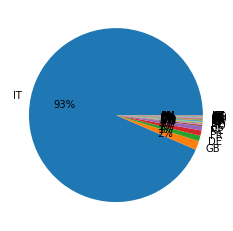

In [17]:
plt.pie(dataset.country.value_counts(),
        labels=dataset.country.value_counts().index,
        autopct='%.0f%%')
plt.show()
# Italia , here we go our 93% customer base is in italy,
# we could use a seperate analysis just for italia.

In [18]:
dataset_it = dataset[dataset.country == 'IT']
dataset_it.shape
# representing the dataset just for ITALIA

(272729, 13)

In [20]:
dataset_it['conversion_date'].value_counts()[:10]

2020-11-30    1581
2020-11-27    1490
2020-12-01    1249
2019-12-02    1171
2019-01-02    1147
2019-01-14    1016
2020-11-28    1003
2019-11-29     990
2019-01-07     984
2019-01-03     978
Name: conversion_date, dtype: int64

In [21]:
# JUST MAKING SURE IF ITS CORRECT OR NOT
dataset_it.groupby('conversion_name').size()


conversion_name
Cancel              7926
Purchase          242877
Return             17864
ReturnToSender      4062
dtype: int64

C:\Users\mk98s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


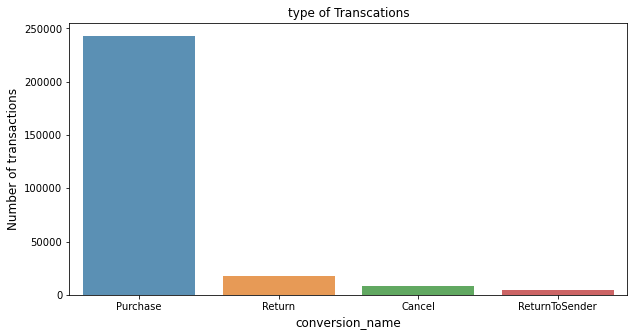

In [22]:
# LETS REPRESENT OUR CONVERSIONS AND SEE HOW IT LOOKS VISUALLY

conversion_count  = dataset_it['conversion_name'].value_counts()
conversion_count = conversion_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(conversion_count.index, conversion_count.values, alpha=0.8)
plt.title('type of Transcations')
plt.ylabel('Number of transactions', fontsize=12)
plt.xlabel('conversion_name', fontsize=12)
plt.show()

# Here's our leaning tower of purchase

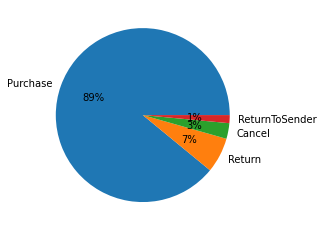

In [23]:
plt.pie(dataset_it.conversion_name.value_counts(),
        labels=dataset_it.conversion_name.value_counts().index,
        autopct='%.0f%%')
plt.show()
# HERE WE CAN PLOT OUR CONVERSION PERCENTAGE WE CAN SEE THAT IN ITALY 89% PUCHASES WERE SUCCESSFULL

In [26]:
dataset_it['city'].value_counts()[:10]

roma       10032
milano      7754
napoli      3476
torino      3000
bologna     2038
parma       1662
genova      1530
pavia       1492
firenze     1325
bari        1172
Name: city, dtype: int64

In [27]:
display(dataset_it.sort_values('conversion_date')[:10])

# just sorting the data based on date


,email,phone,first_name,last_name,zip,city,country,conversion_name,conversion_date,conversion_id,conversion_value,conversion_value_margin,handling_cost
87387,7866162ba31eec860e6843f07fefceb7f665a1074076,aae9fbff852d6fce490b9f0d9667d84eac689e00d356,ffe138c1680e8e3c824daa5c3eeba673825b9a009286,1b0038a187ca1020dfa553b3d72ff4d38520a01019f8,198,roma,IT,Purchase,2019-01-01,552125,1173.9,94.16,-55.0
18108,713753d111fff6fde430aba308a25f6a477782e31ba3,26264c0fb41bf3d2800968ec6b4910be891c4e16bff2,bb3625483bd43ccdfa894eb7a88187d3ee261d4fdd2b,599792ddf8e510d5e8e5e5b82059a334c794c94937c8,80139,napoli,IT,Purchase,2019-01-01,551934,578.5,-4.51,3.0
225475,4f79ebda2dc87893942a5a5411be8fc21e4718977e26,dd7d330115c1d21d46e0cba238846e82ee688392e2d3,e4c2eed8a6df0147265631e9ff25b70fd0e4b3a24689,54890fda1082ccabbfb03af634fba22608e4f4bc2122,84015,nocera superiore,IT,Purchase,2019-01-01,552185,717.6,232.43,-91.5
140554,12ecb707fba5f5c4be6d999ab785d4904decce981c67,11a2cc92d1c59b041a3e1b5c20d81e0be704d7516680,4d462242da3ee0a0ceb1a9543b42686f184d5cd237bb,77ce2ff9abf0150a02af81c33c0b582867232e7e09a8,24040,bottanuco,IT,Purchase,2019-01-01,552187,422.5,0.55,-33.5
18101,8bc5c83b496db5b87ed4ba142f4736855aa94e5d6f92,307f71c42a99a8c6288f37ba7ebc6383d400987506c8,76151dc2a2d65a0dd2ebb8475920383ab07dfaecbda6,c1985e02cf6b24e597ca25bc7ad691cb23492a4cb50c,95027,san gregorio di catania,IT,Purchase,2019-01-01,552166,643.5,-65.45,3.0
225383,8721248d281ff63b193f7b79ee220bd22d7ba237e532,7c773a34726b8ab0e41f320550d0b800793226912535,254835d73cc88095a30fc74133beabe9d8463b295449,1f39b7fedbef016657a2738966a299699ed87f8c9392,10011,agliÃ¨,IT,Purchase,2019-01-01,551863,903.5,8.91,-91.5
149799,0a3ea1291c2017571a870238375e29fd9792dedcd19b,5e405c36308777ca73299b6bb50b18248bc01ee0b1aa,208ad55e4c4200ca42a73ab260efd6df57efccc95aad,2c973758e1cccae825e566abbe1e340d7620ba79716a,80030,castello di cisterna,IT,Purchase,2019-01-01,551871,513.5,-17.60,-33.5
82056,2563933e137b052a3435cc255d6a5e96a2605ccbb2b2,d9720a6c2cf73a0908a9792bc4fde1592e0ac04594e8,a66fad2bfc42bca8d15842ae8dcdb396a24984ea3edb,eeed029c7ac76e15dce8ba2c0bed447d91dcca4417bf,88040,carlopoli,IT,Purchase,2019-01-01,551927,1300.0,533.17,-55.0
38654,f9e5df8b3971798aa84187daa6c717ce400e76711bf0,d63a3ccd02f65fad5885a315ad6d697bdaa2536b278c,65754389811e569c0c2500d998b4f65fd2c141782d05,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b,76121,barletta,IT,Purchase,2019-01-01,551658,3094.0,-95.48,-40.0
38631,942138a06704f0ea0d496c4fcdc8897d8e9c46cbaef7,e76b3b9a940b8bc9e7b74e18fa337c0adf411357654c,5e9286da8261a15d2b25563de427fdaa515ef7f88e00,d7b10c16241154fd84bf82e93656419180ec94b04a6f,82100,benevento,IT,Purchase,2019-01-01,551752,773.5,-23.87,-40.0


C:\Users\mk98s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


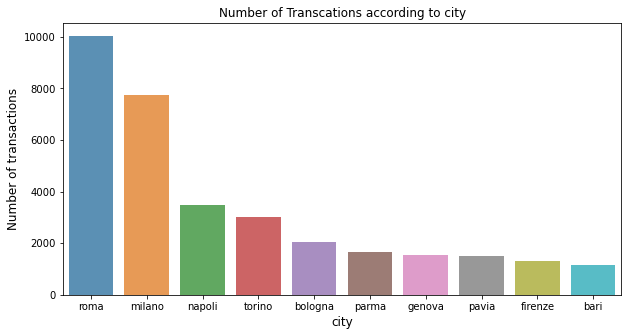

In [28]:
city_count  = dataset_it['city'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Number of Transcations according to city')
plt.ylabel('Number of transactions', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

In [29]:
Cust_date_it=dataset_it[dataset_it['country']=='IT']
Cust_date_it=Cust_date_it[['conversion_name','conversion_date']].drop_duplicates()

# now if Needed we can do a seperate rfm analysis for ITALIA only but I will proceed with all the data i.e with all the countries

In [30]:
dataset_recency = dataset.groupby(by='email',
                        as_index=False)['conversion_date'].min()
dataset_recency.columns = ['email', 'LastPurchaseDate']
recent_date = dataset_recency['LastPurchaseDate'].min()
dataset_recency['Recency'] = dataset_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
dataset_recency.head()

# starting off we calculate the recency

,email,LastPurchaseDate,Recency
0,00001b2e4eb7289182f1834c7360e103a4bd0668aead,2019-02-14,-44
1,000070d28dd1463499ae00c25975526ee400790297a6,2020-06-05,-521
2,0000a860ea4b614addb407de1f5c0cd98ca487d80370,2019-06-20,-170
3,0000b4a6700e0329a114c99ef3801e6b716080549210,2020-06-05,-521
4,0001160167ed97aa7f7ceac519ef53207561b0599308,2019-01-01,0


In [31]:
display(dataset_recency.sort_values('Recency')[:10])

,email,LastPurchaseDate,Recency
140228,d6ed837eea6e60b73da0ee53f7cf037187c12585b6d3,2020-12-01,-700
65386,645b9499629bbfb448a6d0065b1b271dfdb4304f9ad7,2020-12-01,-700
144027,dcb1764245d4fae5153be2a3e42cfd870644c1b443ae,2020-12-01,-700
19125,1d2829f8fe46f06272d06976b512aaa1d6c2d31b56d8,2020-12-01,-700
68831,69c5381442eca176bc32e5a0df89f554469958ed5d4c,2020-12-01,-700
116246,b2104c0aa38dd90f8ea72b97e141aa165b714d785d4e,2020-12-01,-700
154682,ecf37d7708bb2bb7cfe3a6ab7963783e190b9ae59613,2020-12-01,-700
117384,b3e6b95f379a7405d5b17b182872b5d7ef0452bcceeb,2020-12-01,-700
4546,06b88834a71ffcd1ba16c44804c110286484852f8417,2020-12-01,-700
125199,bfce321737d9f580ff251b560ff41490cb027910a06f,2020-12-01,-700


In [32]:
frequency_dataset = dataset.drop_duplicates().groupby(
    by=['email'], as_index=False)['conversion_date'].count()
frequency_dataset.columns = ['email', 'Frequency']
frequency_dataset.head()

# now we calculate the frequency

,email,Frequency
0,00001b2e4eb7289182f1834c7360e103a4bd0668aead,1
1,000070d28dd1463499ae00c25975526ee400790297a6,1
2,0000a860ea4b614addb407de1f5c0cd98ca487d80370,1
3,0000b4a6700e0329a114c99ef3801e6b716080549210,1
4,0001160167ed97aa7f7ceac519ef53207561b0599308,11


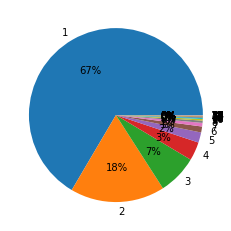

In [33]:
plt.pie(frequency_dataset.Frequency.value_counts(),
        labels=frequency_dataset.Frequency.value_counts().index,
        autopct='%.0f%%')
plt.show()

C:\Users\mk98s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


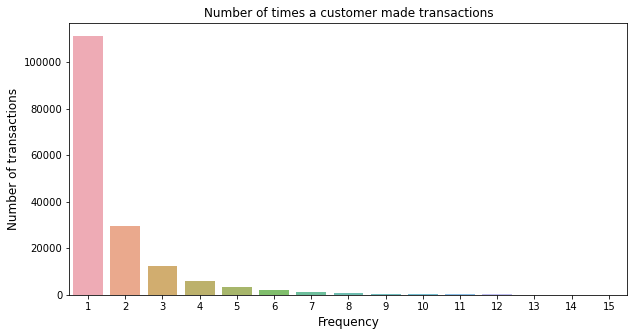

In [34]:
freq_count  = frequency_dataset['Frequency'].value_counts()
freq_count = freq_count[:15,]
plt.figure(figsize=(10,5))
sns.barplot(freq_count.index, freq_count.values, alpha=0.8)
plt.title('Number of times a customer made transactions')
plt.ylabel('Number of transactions', fontsize=12)
plt.xlabel('Frequency', fontsize=12)
plt.show()

In [36]:
display(frequency_dataset.sort_values('Frequency')[:10])

,email,Frequency
0,00001b2e4eb7289182f1834c7360e103a4bd0668aead,1
100163,99a30a3853c10d7b569d106efa141fbf3e700f989be4,1
100162,99a2d7f0a1589ff15e87e873b3bffa263864dbb4d9d8,1
100160,99a2317bf2b98b67054220ae5f9e94b2bea1f54a138b,1
100159,99a2022836cad5b9710181563944fc15b7cd499ad6fb,1
100158,99a16d983cc4c2fd4b7f1c63b7b87b0c704d4a26907c,1
100156,99a14d76a4c0543b4be8022c23b46ecc6a3efade54e0,1
100155,99a127f91268f01733374e0dd3138091e4f4420dc39d,1
100154,99a10c61485ff52120247087127d86870277a4c47a80,1
100152,999fa6fbfdfb958fbf54dbb56a67009ef02cc67ffb86,1


In [37]:
dataset['Total'] = dataset['conversion_value']+dataset['handling_cost']
monetary_dataset = dataset.groupby(by='email', as_index=False)['Total'].sum()
monetary_dataset.columns = ['email', 'Monetary']
monetary_dataset

# calculating the monetary value , here we can see the dataset getting reduced that 
# means I have combined the customers who made two ore more transactins


,email,Monetary
0,00001b2e4eb7289182f1834c7360e103a4bd0668aead,330.5
1,000070d28dd1463499ae00c25975526ee400790297a6,169.3
2,0000a860ea4b614addb407de1f5c0cd98ca487d80370,268.1
3,0000b4a6700e0329a114c99ef3801e6b716080549210,615.7
4,0001160167ed97aa7f7ceac519ef53207561b0599308,10106.9
...,...,...
167225,fffee6da05a8346478f60275454a510eedc6693ed09f,3736.0
167226,ffff447aa42252107b1181612d6a3c5d65f1248dd882,1610.5
167227,ffff721154544dfc09eb70ee87309631775da51c82ef,1143.5
167228,ffffac7d8e5f76e72616c5e7b7b15b7678767cb599da,591.0


In [39]:
# merging all the values together to represent customers all three ratings i.e R, F, and M
rf_dataset = dataset_recency.merge(frequency_dataset, on='email')
rfm_dataset = rf_dataset.merge(monetary_dataset, on='email').drop(
    columns='LastPurchaseDate')
rfm_dataset.head()

,email,Recency,Frequency,Monetary
0,00001b2e4eb7289182f1834c7360e103a4bd0668aead,-44,1,330.5
1,000070d28dd1463499ae00c25975526ee400790297a6,-521,1,169.3
2,0000a860ea4b614addb407de1f5c0cd98ca487d80370,-170,1,268.1
3,0000b4a6700e0329a114c99ef3801e6b716080549210,-521,1,615.7
4,0001160167ed97aa7f7ceac519ef53207561b0599308,0,11,10106.9


In [40]:
display(rfm_dataset.sort_values('Frequency')[:10])

,email,Recency,Frequency,Monetary
0,00001b2e4eb7289182f1834c7360e103a4bd0668aead,-44,1,330.50
100163,99a30a3853c10d7b569d106efa141fbf3e700f989be4,-309,1,709.30
100162,99a2d7f0a1589ff15e87e873b3bffa263864dbb4d9d8,-558,1,488.50
100160,99a2317bf2b98b67054220ae5f9e94b2bea1f54a138b,-635,1,972.00
100159,99a2022836cad5b9710181563944fc15b7cd499ad6fb,-36,1,1355.40
100158,99a16d983cc4c2fd4b7f1c63b7b87b0c704d4a26907c,-510,1,805.50
100156,99a14d76a4c0543b4be8022c23b46ecc6a3efade54e0,-689,1,480.00
100155,99a127f91268f01733374e0dd3138091e4f4420dc39d,-173,1,584.50
100154,99a10c61485ff52120247087127d86870277a4c47a80,-267,1,1715.50
100152,999fa6fbfdfb958fbf54dbb56a67009ef02cc67ffb86,-381,1,607.35


In [29]:
rfm_dataset.sort_values("Recency", axis = 0, ascending = True,
                 inplace = True, na_position ='first')

rfm_dataset


,email,Recency,Frequency,Monetary
140228,d6ed837eea6e60b73da0ee53f7cf037187c12585b6d3,-700,1,654.70
65386,645b9499629bbfb448a6d0065b1b271dfdb4304f9ad7,-700,1,343.50
144027,dcb1764245d4fae5153be2a3e42cfd870644c1b443ae,-700,1,1585.50
19125,1d2829f8fe46f06272d06976b512aaa1d6c2d31b56d8,-700,1,718.40
68831,69c5381442eca176bc32e5a0df89f554469958ed5d4c,-700,1,1975.50
...,...,...,...,...
38854,3b7d50dca83fdb24a39da9cfe367ef4fa29b0fed2032,0,2,2255.80
5284,07de073bef543387ec5112ad744a9e5c61c88cba8f99,0,2,1093.90
38731,3b4e6898e1a0fb818a91ebae6d3cecdcb6a19bb43265,0,1,1037.00
146740,e0b1c7e4528fec57cb9f71bfbbf3ec9b848a9787ec95,0,3,686.40


In [30]:
# HERE I have ranked the customers based on R,F, and M
rfm_dataset['R_rank'] = rfm_dataset['Recency'].rank(ascending=True)
rfm_dataset['F_rank'] = rfm_dataset['Frequency'].rank(ascending=True)
rfm_dataset['M_rank'] = rfm_dataset['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_dataset['R_rank_norm'] = (rfm_dataset['R_rank']/rfm_dataset['R_rank'].max())*100
rfm_dataset['F_rank_norm'] = (rfm_dataset['F_rank']/rfm_dataset['F_rank'].max())*100
rfm_dataset['M_rank_norm'] = (rfm_dataset['F_rank']/rfm_dataset['M_rank'].max())*100
 
rfm_dataset.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_dataset.head()


,email,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
140228,d6ed837eea6e60b73da0ee53f7cf037187c12585b6d3,-700,1,654.7,0.222854,33.262274,33.262274
65386,645b9499629bbfb448a6d0065b1b271dfdb4304f9ad7,-700,1,343.5,0.222854,33.262274,33.262274
144027,dcb1764245d4fae5153be2a3e42cfd870644c1b443ae,-700,1,1585.5,0.222854,33.262274,33.262274
19125,1d2829f8fe46f06272d06976b512aaa1d6c2d31b56d8,-700,1,718.4,0.222854,33.262274,33.262274
68831,69c5381442eca176bc32e5a0df89f554469958ed5d4c,-700,1,1975.5,0.222854,33.262274,33.262274


In [31]:
# scoring customers
rfm_dataset['RFM_Score'] = 0.15*rfm_dataset['R_rank_norm']+0.28 * \
    rfm_dataset['F_rank_norm']+0.57*rfm_dataset['M_rank_norm']
rfm_dataset['RFM_Score'] *= 0.05
rfm_dataset = rfm_dataset.round(2)
rfm_dataset[['email', 'RFM_Score']].head(7)

,email,RFM_Score
140228,d6ed837eea6e60b73da0ee53f7cf037187c12585b6d3,1.42
65386,645b9499629bbfb448a6d0065b1b271dfdb4304f9ad7,1.42
144027,dcb1764245d4fae5153be2a3e42cfd870644c1b443ae,1.42
19125,1d2829f8fe46f06272d06976b512aaa1d6c2d31b56d8,1.42
68831,69c5381442eca176bc32e5a0df89f554469958ed5d4c,1.42
116246,b2104c0aa38dd90f8ea72b97e141aa165b714d785d4e,1.42
154682,ecf37d7708bb2bb7cfe3a6ab7963783e190b9ae59613,1.42


In [51]:
# segmenting customers based on the RFM ranking which eventually provides us with an insight which can tell profitable customers
rfm_dataset["Customer_segment"] = np.where(rfm_dataset['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_dataset['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
rfm_dataset['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_dataset['RFM_Score'] > 1.5,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_dataset[['email', 'RFM_Score', 'Customer_segment']].head(20)

,email,RFM_Score,Customer_segment
140228,d6ed837eea6e60b73da0ee53f7cf037187c12585b6d3,1.42,Lost Customers
65386,645b9499629bbfb448a6d0065b1b271dfdb4304f9ad7,1.42,Lost Customers
144027,dcb1764245d4fae5153be2a3e42cfd870644c1b443ae,1.42,Lost Customers
19125,1d2829f8fe46f06272d06976b512aaa1d6c2d31b56d8,1.42,Lost Customers
68831,69c5381442eca176bc32e5a0df89f554469958ed5d4c,1.42,Lost Customers
116246,b2104c0aa38dd90f8ea72b97e141aa165b714d785d4e,1.42,Lost Customers
154682,ecf37d7708bb2bb7cfe3a6ab7963783e190b9ae59613,1.42,Lost Customers
117384,b3e6b95f379a7405d5b17b182872b5d7ef0452bcceeb,1.42,Lost Customers
4546,06b88834a71ffcd1ba16c44804c110286484852f8417,1.42,Lost Customers
125199,bfce321737d9f580ff251b560ff41490cb027910a06f,1.42,Lost Customers


In [52]:
rfm_dataset.shape

(167230, 9)

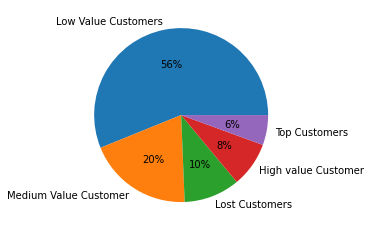

In [53]:
plt.pie(rfm_dataset.Customer_segment.value_counts(),
        labels=rfm_dataset.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()


# FINAL REPRESENTATION OF CUSTOMERS

HERE WE CAN SEE FIVE GROUP OF CUSTOMERS 
* TOP CUSTOMERS: THESE ARE THE CUSTOMER WHO HAVE MADE SEVERAL SUCCESFULL PURCHASES WITH REALLY HIGH PROFIT VALUE
* HIGH VALUE CUSTOMER: THESE ARE THE CUSTOMER WHO HAVE MADE TWO OR MORE SUCCESFULL PURCHASES WITH MODERATELY HIGH PROFIT VALUE
* MEDIUM VALUE CUSTOMERS : THESE ARE THE CUSTOMER WHO HAVE MADE AROUND ONE OR TWO SUCCESFULL PURCHASES WITH MODERATE PROFIT VALUE
* LOW VALUE CUSTOMERS : THESE ARE THE CUSTOMER WHO HAVE MADE SINGLE SUCCESFULL PURCHASES WITH LOW PROFIT VALUE
* LOST CUSTOMERS : THESE ARE THE CUSTOMER WHO HAVE CANCELLED OR RETURNED PRODUCTS POSSIBLY CAUSING LOSS

# Alternative
* Clustering: Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).
This way we can form groups leading us to insights, groupinh high value customers or how many times a single cusomer made purhases.
WE CAN ALSO USE SQL/EXCEL FOR THE ANALYSIS BUT OUR DATASET WOULD BE QUITE LARGE FOR EXCEL TO HANDLE